In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
dataf=pd.read_csv("CleanedSuperStore.csv")
dataf.describe()

,weeknum,Year,Quantity,Sales,Discount,Profit
count,49973.000000,49973.000000,49828.000000,49973.000000,49522.000000,49973.000000
mean,31.282152,2012.778260,3.474894,246.841034,0.142962,28.738938
std,14.432617,1.098615,2.277124,489.223948,0.212402,174.881552
min,1.000000,2011.000000,1.000000,0.000000,0.000000,-6599.978000
25%,20.000000,2012.000000,2.000000,31.000000,0.000000,0.000000
50%,33.000000,2013.000000,3.000000,85.000000,0.000000,9.255200
75%,44.000000,2014.000000,5.000000,251.000000,0.200000,36.840000
max,53.000000,2014.000000,14.000000,22638.000000,0.850000,8399.976000


Sales by Region and state:
Sales vs. Profit by Category and Sub-Category:
Top Three Cities by Sales Over Time:
Bottom Three Cities by Sales Over Time:
Top Performing Sub-Categories:
Top Products by Sales vs. Profit:

In [ ]:
# Group data by Region and State
sales_region_state = dataf.groupby(['Region', 'Country'])['Sales'].sum().unstack()

# Plot
sales_region_state.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sales by Region and State')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

                                  Sales       Profit
Category        Sub.Category                        
Furniture       Bookcases     1421985.0  160822.0529
                Chairs        1458569.0  136618.7213
                Furnishings    372818.0   45085.9970
                Tables         726207.0  -64359.0923
Office Supplies Appliances     992368.0  140423.5332
                Art            360818.0   55785.3146
                Binders        445039.0   67723.4756
                Envelopes      165359.0   28708.1794
                Fasteners       80844.0   11222.8406
                Labels          71306.0   14616.7417
                Paper          235490.0   56898.2291
                Storage       1091683.0  104278.5277
                Supplies       235302.0   22022.8351
Technology      Accessories    722980.0  124792.4403
                Copiers       1463148.0  254578.1096
                Machines       757569.0   57952.8504
                Phones        1651065.0  21029

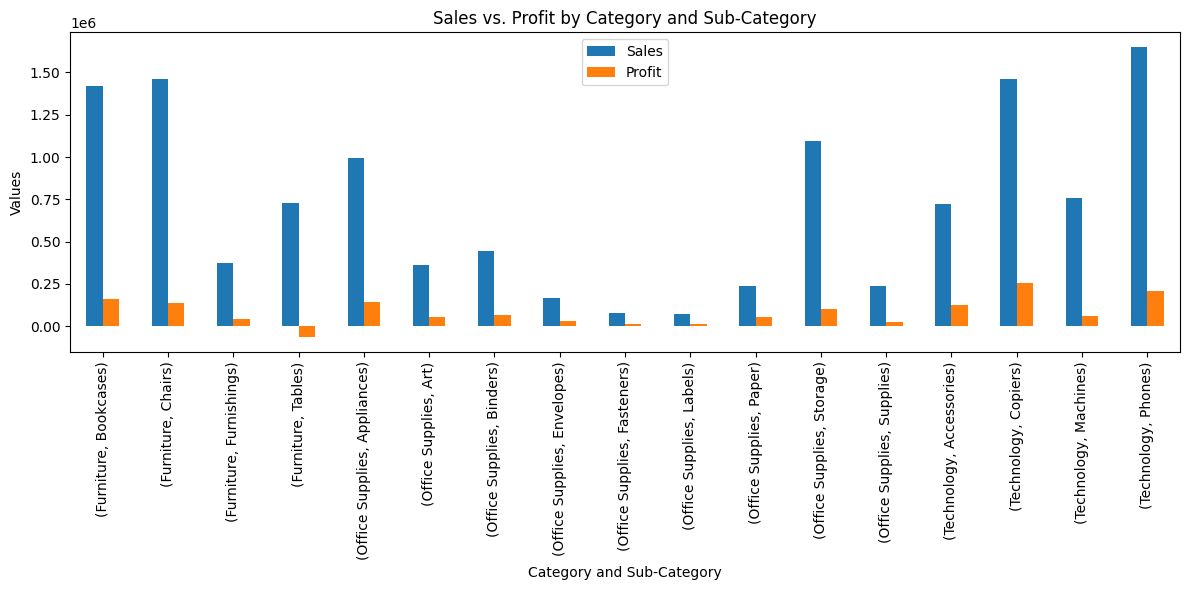

In [6]:
# Group data by Category and Sub-Category
category_profit_sales = dataf.groupby(['Category', 'Sub.Category'])[['Sales', 'Profit']].sum()
print(category_profit_sales)
# Plot
category_profit_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Sales vs. Profit by Category and Sub-Category')
plt.xlabel('Category and Sub-Category')
plt.ylabel('Values')
plt.tight_layout()
plt.show()


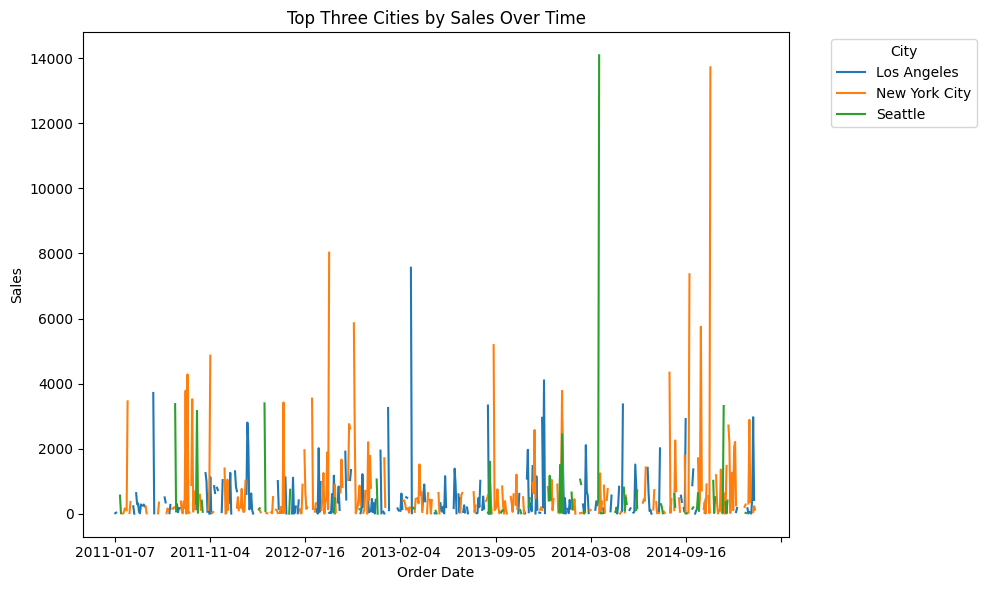

In [8]:
# Group by City and sum Sales
top_cities = dataf.groupby('City')['Sales'].sum().nlargest(3).index
top_city_data = dataf[dataf['City'].isin(top_cities)].groupby(['City', 'Order.Date'])['Sales'].sum().unstack()

# Plot
top_city_data.T.plot(figsize=(10, 6))
plt.title('Top Three Cities by Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


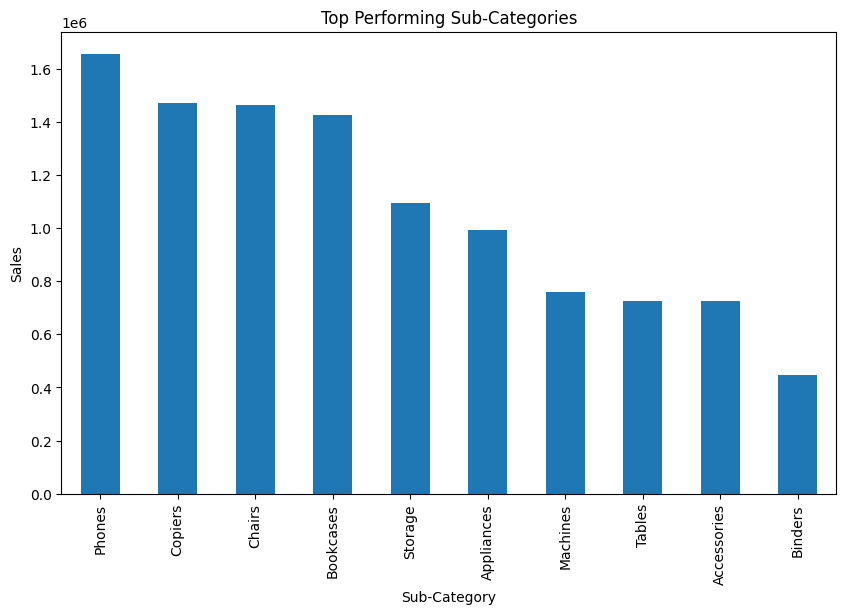

In [13]:
# Sum Sales by Sub-Category
top_subcategories = dataf.groupby('Sub.Category')['Sales'].sum().nlargest(10)

# Plot
top_subcategories.plot(kind='bar', figsize=(10, 6))
plt.title('Top Performing Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
#plt.tight_layout()
plt.show()


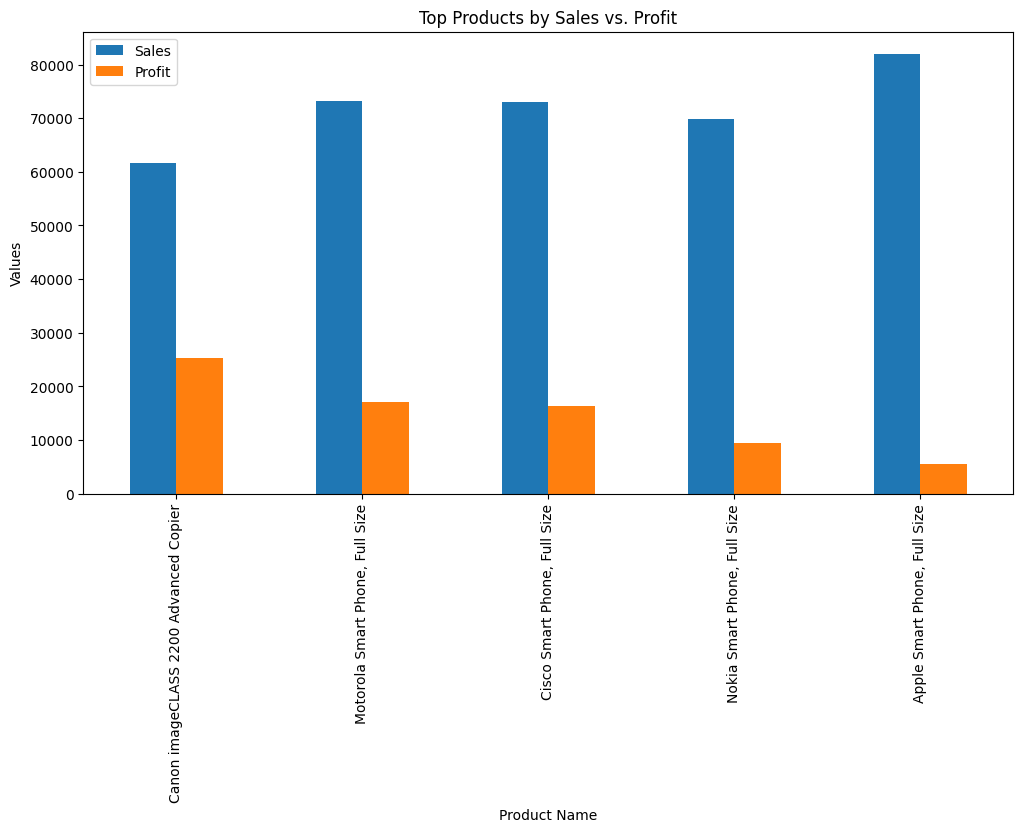

In [17]:
# Group by Product and sum Sales and Profit
top_products = dataf.groupby('Product.Name')[['Sales', 'Profit']].sum().nlargest(5, 'Sales').sort_values(by= 'Profit', ascending=False)

# Plot
top_products.plot(kind='bar', figsize=(12, 6))
plt.title('Top Products by Sales vs. Profit')
plt.xlabel('Product Name')
plt.ylabel('Values')
#plt.tight_layout()
plt.show()
